# Population Density

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point


Clean up the csv

In [21]:
pop_density = pd.read_excel('../Data/Population-Density-Final.xlsx', sheet_name='DATA', skiprows = 10).drop(columns = ['Unnamed: 0'])

In [22]:
pop_density.head()

,Zip,population,density,City,St,State,CitySt,County,Country,Coordinates,lat,long
0,92337,38868,1049.1,Fontana,California,CA,"Fontana,CA",San Bernardino,US,"34.0498, -117.4706",34.0498,-117.4706
1,92338,0,0.0,Ludlow,California,CA,"Ludlow,CA",San Bernardino,US,"34.7211, -116.16",34.7211,-116.1600
2,92339,1185,32.3,Forest Falls,California,CA,"Forest Falls,CA",San Bernardino,US,"34.0937, -116.9362",34.0937,-116.9362
3,92340,1185,32.3,Hesperia,California,CA,"Hesperia,CA",San Bernardino,US,"34.4264, -117.3009",34.4264,-117.3009
4,92341,203,22.4,Green Valley Lake,California,CA,"Green Valley Lake,CA",San Bernardino,US,"34.2348, -117.066",34.2348,-117.0660


In [23]:
pop_density = pop_density[pop_density['State'] == 'VA']
pop_density = pop_density.dropna(subset=["lat", "long", "density"])
len(pop_density)

1214

In [28]:
pop_density

,Zip,population,density,City,St,State,CitySt,County,Country,Coordinates,lat,long
18001,23976,53,11.5,Wylliesburg,Virginia,VA,"Wylliesburg,VA",Charlotte,US,"36.8391, -78.5982",36.8391,-78.5982
18002,23112,53162,560.2,Midlothian,Virginia,VA,"Midlothian,VA",Chesterfield,US,"37.431, -77.6545",37.4310,-77.6545
18003,23113,25076,260.0,Midlothian,Virginia,VA,"Midlothian,VA",Chesterfield,US,"37.5109, -77.6429",37.5109,-77.6429
18004,23114,18540,598.0,Midlothian,Virginia,VA,"Midlothian,VA",Chesterfield,US,"37.4815, -77.6419",37.4815,-77.6419
18005,23120,10025,36.1,Moseley,Virginia,VA,"Moseley,VA",Chesterfield,US,"37.426, -77.7585",37.4260,-77.7585
...,...,...,...,...,...,...,...,...,...,...,...,...
19996,23959,1364,8.3,Phenix,Virginia,VA,"Phenix,VA",Charlotte,US,"37.0925, -78.7912",37.0925,-78.7912
19997,23962,472,5.5,Randolph,Virginia,VA,"Randolph,VA",Charlotte,US,"36.9515, -78.7054",36.9515,-78.7054
19998,23963,121,10.4,Red House,Virginia,VA,"Red House,VA",Charlotte,US,"37.1914, -78.8145",37.1914,-78.8145
19999,23964,1051,10.0,Red Oak,Virginia,VA,"Red Oak,VA",Charlotte,US,"36.7724, -78.6321",36.7724,-78.6321


In [27]:
fig, ax = plt.subplots(figsize=(40, 40), dpi=600)

sc = ax.scatter(pop_density["long"], pop_density["lat"], 
                c=pop_density["density"], cmap="Reds", label="Population Density")

cbar = plt.colorbar(sc, ax=ax)#, fraction=0.02, pad=0.02)
cbar.set_label("Population Density")

plt.title("Population Density in Virginia")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(False)

# Show plot
plt.show()

In [41]:
from rasterio.mask import mask
from shapely.geometry import box


In [132]:
#va_map = gpd.read_file('../Data/virginiamap.shp', SHAPE_RESTORE_SHX = 'yes')
va_map = gpd.read_file('../Data/tl_2023_51_place/tl_2023_51_place.shp')

with rasterio.open("../Data/usa_pd_2020_1km.tif") as src:
    shapes = va_map.geometry.values
    
    out_image, out_transform = mask(src, shapes, crop=True)
    out_meta = src.meta.copy()
    
    bounds = va_map.total_bounds

out_meta.update({
    "height": out_image.shape[1],
    "width": out_image.shape[2],
    "transform": out_transform
})

In [133]:
data = out_image[0]
data[data == -99999.0] = np.nan

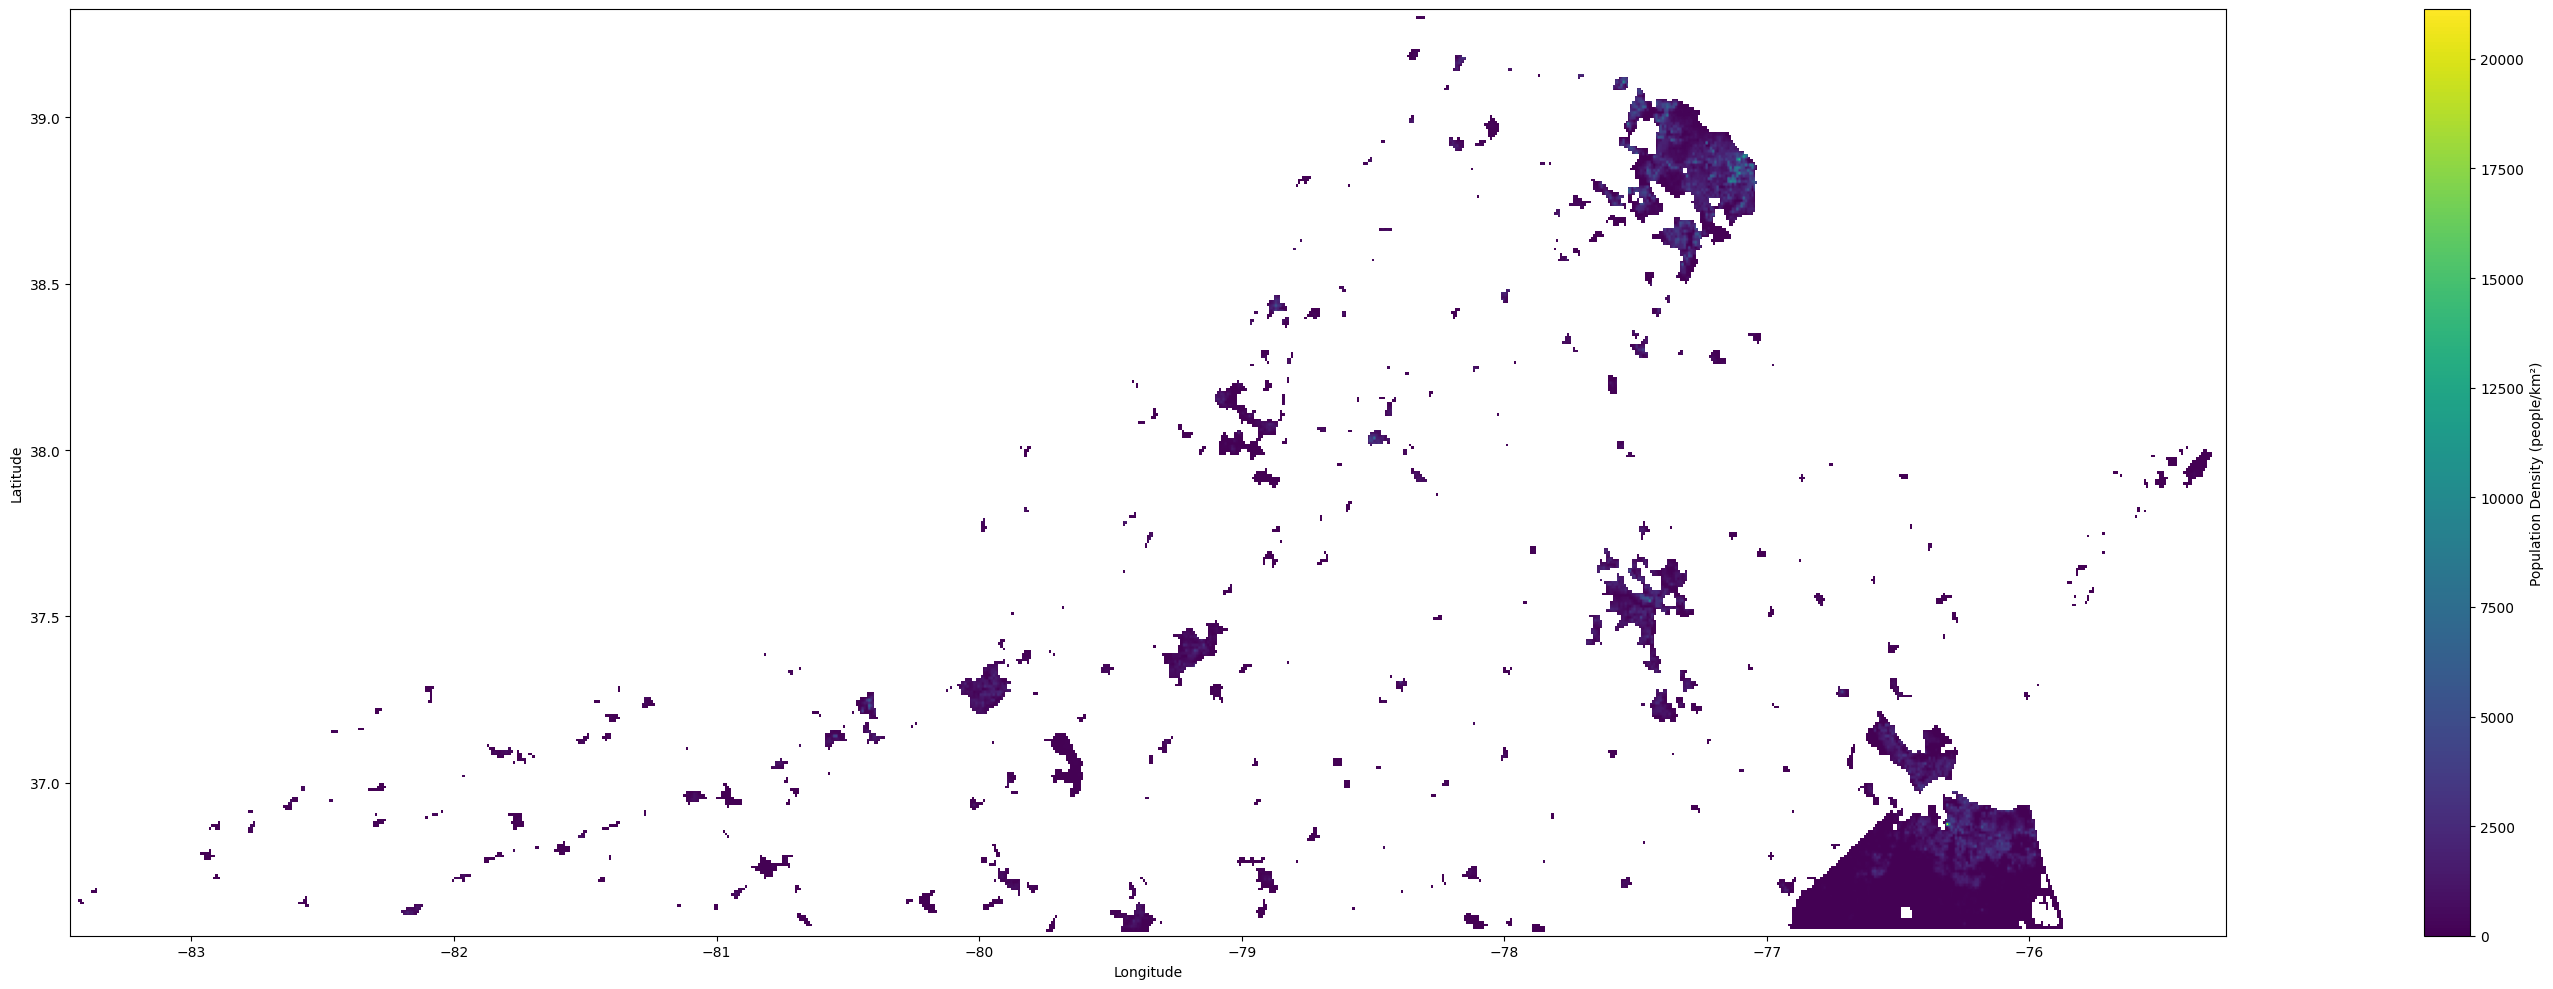

In [134]:
fig, ax = plt.subplots(figsize=(40, 10))
ax.set_facecolor("white")

cmap = plt.cm.viridis
im = ax.imshow(data, extent=[bounds[0], bounds[2], bounds[1], bounds[3]])#,norm=norm)
va_map.boundary.plot(ax=ax, color='black', linewidth=0)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
cbar = plt.colorbar(im, ax=ax, label="Population Density (people/km²)")

plt.tight_layout()
plt.show()
